# The Classical IM (Ianniruberto, G.and Marrucci, G.) Model
ref: Ianniruberto, G.; Marrucci, G. A simple constitutive equation for entangled polymers with chain stretch. *Journal of Rheology* __2001__, 45, 1305-1318.  
Define an effective time $\tau$ to replace the disengagement time $\tau_d$ in DE model:  
The classical DE model of $\mathbf{S}(t)$ is replaced to be:  

$$\begin{align}
\mathbf{S}(t) &= \int_{-\infty}^t \left[\frac{1}{\tau(t')}\right] \exp \left[-\int_{t'}^t \frac{dt''}{\tau(t'')}\right] \mathbf{Q}\left[\mathbf{E}(t,t')\right] dt' \\
\tau &= \frac{1}{2\left(\frac{1}{\tau_d}+\boldsymbol{\kappa}:\mathbf{S}\right)} +\tau_R \\
\frac{d\lambda}{dt} &= \lambda\boldsymbol{\kappa}:\mathbf{S} - \frac{\lambda F(\lambda)-1}{\tau_R} \\
F(\lambda)&=\left(\frac{\lambda_{max}^2-\frac{\lambda^2}{3}}{\lambda_{max}^2-\lambda^2}\right)\left(\frac{\lambda_{max}^2-1}{\lambda_{max}^2-\frac{1}{3}}\right) \\
\boldsymbol{\sigma} &= 3G_N^0F(\lambda)\lambda^2\boldsymbol{S}
\end{align}$$  

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab
from IM_Model import IM_SingleMode_integral
import time

In [2]:
#parameters for PS133k in ref: Costanzo, S. et al. Macromolecules 2016, 49, 3925-3935.
GN0 = 2.79E5
τc = 1.24E-3
τR = 0.124
λmax = 3.34
CQ = 6
β = 0.25
Gi = np.array([1.14E2, 2.52, 8.80E-1, 3.81E-1, 2.07E-1, 1.70E-1, 1.76E-1, 1.37E-1, 2.03E-1]) * GN0
τi_eq = np.array([2.16E-3, 5.90E-2, 3.33E-1, 1.53, 6.87, 2.9E1, 1.11E2, 3.63E2, 8.92E2]) * τc
τd_eq = np.sum(Gi*τi_eq**2)/np.sum(Gi*τi_eq)
shear_rate = 31.6 # 1/s
δt = 0.001 # seconds
finish_time = 10 # senconds

In [3]:
t0 = time.time()
t_span, τd_span, σ_span, λ_span, S_span = IM_SingleMode_integral(λmax=λmax,τR=τR,shear_rate=shear_rate,β = β, δt=δt,
                                                                finish_time=finish_time,GN0=GN0,τd_eq=τd_eq)
print('Cost time: ', time.time() - t0, ' s')

Cost time:  3.9722774028778076  s


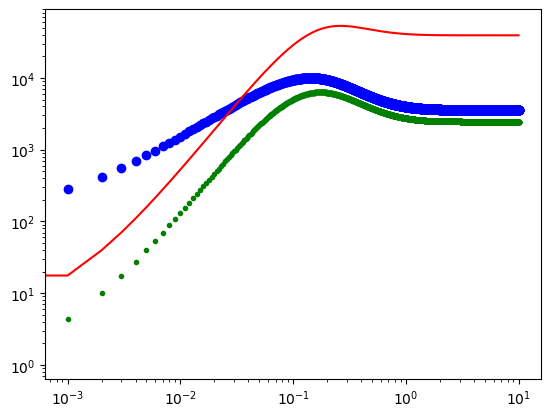

In [4]:
pylab.loglog(t_span-δt,σ_span[:,0,1]/shear_rate,'bo')
pylab.loglog(t_span-δt,(σ_span[:,0,0]-σ_span[:,1,1])/shear_rate,'r-')
pylab.loglog(t_span-δt,(σ_span[:,2,2]-σ_span[:,1,1])/shear_rate,'g.')

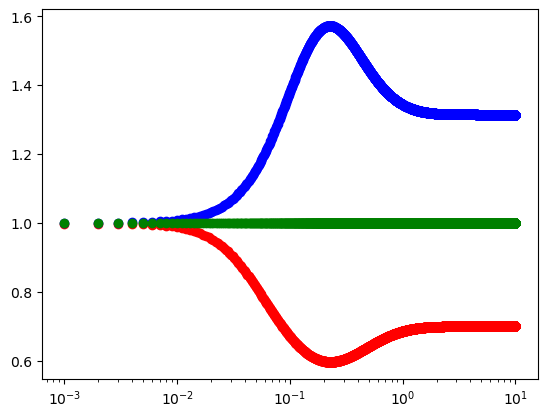

In [5]:
pylab.semilogx(t_span,τd_span,'ro')
pylab.semilogx(t_span,λ_span,'bo')
pylab.semilogx(t_span,S_span[:,0,0]+S_span[:,1,1]+S_span[:,2,2],'go')